In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
#from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
#import matplotlib.pyplot as plt
import os

### Close-Set

In [56]:
# brain_shallow_close=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/BrainInvaders15a/Experiments/Single_Session_Evaluation/Shallow_Classifiers/close_set.csv')
# brain_siamese_close=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/BrainInvaders15a/Experiments/Single_Session_Evaluation/Siamese/Close_Set.csv')
# brain_shallow_open=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/BrainInvaders15a/Experiments/Single_Session_Evaluation/Shallow_Classifiers/open_set.csv')
# brain_siamese_open=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/BrainInvaders15a/Experiments/Single_Session_Evaluation/Siamese/Open_Set.csv')


# cogbci_shallow_close=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/COG_BCI_Flanker/Experiments/Single_Session/Shallow_Classifiers/Close_Set.csv')
# cogbci_siamese_close=pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/COG_BCI_Flanker/Experiments/Single_Session/Siamese/Close_Set.csv')
# cogbci_shallow_open
# cogbci_siamese_open

# erpCoreP300_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/ERPCORE_P300/single_session_SOA_close_set_res_dataframe.csv')
# erpCoreP300_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/ERPCORE_P300/single_session_siamese_close_set_res_dataframe.csv')

# erpCoreN400_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/ERPCORE_N400/single_session_SOA_close_set_res_dataframe.csv')
# erpCoreN400_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/ERPCORE_N400/single_session_siamese_close_set_res_dataframe.csv')

# Huebner_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Huebner_llp/single_session_SOA_close_set_res_dataframe.csv')
# Huebner_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Huebner_llp/single_session_siamese_close_set_res_dataframe.csv')

# Sosulski_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Sosulski2019/single_session_SOA_close_set_res_dataframe.csv')
# Sosulski_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Sosulski2019/single_session_siamese_close_set_res_dataframe.csv')

# Mantegna_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Mantegna2019/single_session_SOA_close_set_res_dataframe.csv')
# Mantegna_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Mantegna2019/single_session_siamese_close_set_res_dataframe.csv')

# Won_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Won2022/single_session_SOA_close_set_res_dataframe.csv')
# Won_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Won2022/single_session_siamese_close_set_res_dataframe.csv')

# lee_shallow_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Lee_Multi_Session_200_samples/single_session_SOA_close_set_res_dataframe.csv')
# lee_siamese_close=pd.read_csv('/scratch/hpc-prf-bbam/avinashk/Brain-Models/examples/Lee_Multi_Session_200_samples/single_session_siamese_close_set_res_dataframe.csv')

In [57]:
list_df=[]
Results_path="/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results"
for dataset in os.listdir(Results_path):
    dataset_path=os.path.join(Results_path, dataset, "Experiments")
    #print(dataset_path)
    #print(dataset_path)
    for results in os.listdir(dataset_path):
        if (results=='Single_Session'):
            single_session_path=os.path.join(dataset_path, results)
            
            for classifiers in os.listdir(single_session_path):
                classifier_path=os.path.join(single_session_path, classifiers)
                
                for scenario in os.listdir(classifier_path):
                    
                    scenaario_path=os.path.join(classifier_path, scenario)
                    df=pd.read_csv(scenaario_path)
                    list_df.append(df)
                    
                    #print(scenaario_path)
                    #print(scenario)
                #print(classifier_path)
                #print(classifiers)
            #print(single_session_path)
        else:
            continue
            

In [58]:
df_final=pd.concat(list_df, axis=0)

In [59]:
table_df_close=df_final.groupby(['dataset','evaluation', 'eval Type','pipeline']).agg({
                #"subject": 'nunique',
                #'n_samples': 'first',
                #'accuracy': 'mean',
                #'auc': 'mean',
                #'eer': lambda x: f'{np.mean(x)*100:.2f} ± {np.std(x)*100:.2f}',
                'eer': lambda x: f'{np.mean(x)*100:.2f}'
#                 'frr_1_far': lambda x: f'{np.mean(x)*100:.2f}',
#                 'frr_0.1_far': lambda x: f'{np.mean(x)*100:.2f}',
#                 'frr_0.01_far': lambda x: f'{np.mean(x)*100:.2f}'
            }).reset_index()

In [60]:
#table_df_close
table_df_close

,dataset,evaluation,eval Type,pipeline,eer
0,Brain Invaders 2015a,Single Session,Close Set,AR+PSD+KNN,0.37
1,Brain Invaders 2015a,Single Session,Close Set,AR+PSD+LDA,0.37
2,Brain Invaders 2015a,Single Session,Close Set,AR+PSD+LR,0.16
3,Brain Invaders 2015a,Single Session,Close Set,AR+PSD+NB,3.70
4,Brain Invaders 2015a,Single Session,Close Set,AR+PSD+RF,0.16
...,...,...,...,...,...
121,won 2022,Single Session,Open Set,AR+PSD+LR,2.86
122,won 2022,Single Session,Open Set,AR+PSD+NB,12.89
123,won 2022,Single Session,Open Set,AR+PSD+RF,1.27
124,won 2022,Single Session,Open Set,AR+PSD+SVM,1.96


In [61]:
table_df_close['pipeline']=table_df_close['pipeline'].apply(lambda x: x.split('+')[-1])

In [62]:
#table_df_close[(table_df_close['eval Type']=='Close Set') & (table_df_close['pipeline']=='RF')]

In [63]:
table_df_close['eer']=table_df_close['eer'].astype('float')

for evaluation in table_df_close['eval Type'].unique():
    df_eval=table_df_close[table_df_close['eval Type']==evaluation]
    for pipeline in df_eval.pipeline.unique():
        df_pipeline=df_eval[df_eval['pipeline']==pipeline]
        print("Single Session ",df_pipeline['eval Type'].unique()[0], "Classifier ", df_pipeline['pipeline'].unique()[0], 
             "Average EER ", np.round(df_pipeline['eer'].mean(), 3))
    print("==================================================================")
    print("==================================================================")
        
        #print(df_pipeline)

Single Session  Close Set Classifier  KNN Average EER  3.518
Single Session  Close Set Classifier  LDA Average EER  1.476
Single Session  Close Set Classifier  LR Average EER  0.74
Single Session  Close Set Classifier  NB Average EER  10.722
Single Session  Close Set Classifier  RF Average EER  0.873
Single Session  Close Set Classifier  SVM Average EER  1.39
Single Session  Close Set Classifier  siamese Average EER  1.327
Single Session  Open Set Classifier  KNN Average EER  5.574
Single Session  Open Set Classifier  LDA Average EER  5.544
Single Session  Open Set Classifier  LR Average EER  3.581
Single Session  Open Set Classifier  NB Average EER  11.348
Single Session  Open Set Classifier  RF Average EER  1.536
Single Session  Open Set Classifier  SVM Average EER  2.316
Single Session  Open Set Classifier  siamese Average EER  2.334


In [64]:
# table_df_close['eer']=table_df_close['eer'].astype('float')
# table_df_close[(table_df_close['eval Type']=='Open Set') & (table_df_close['pipeline']=='siamese')]['eer'].mean()

In [65]:
table_df_close['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Visual Speller LLP': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022',
                            'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

In [66]:
table_df_close['pipeline'].replace({'siamese': 'Siamese'}, inplace=True)

In [67]:
#table_df_close.to_csv('Single_Session_Results.csv')
table_df_close['dataset'].unique()

array(['BrainInvaders2015a', 'COG_BCI_Flanker', 'Lee2019', 'Sosulski2019',
       'Huebner_LLP', 'ERPCORE_N400', 'ERPCORE_P300', 'Mantegna2019',
       'Won2022'], dtype=object)

In [68]:
table_df_close[(table_df_close.dataset=='Huebner_LLP')]

,dataset,evaluation,eval Type,pipeline,eer
56,Huebner_LLP,Single Session,Close Set,KNN,0.30
57,Huebner_LLP,Single Session,Close Set,LDA,0.11
58,Huebner_LLP,Single Session,Close Set,LR,0.07
59,Huebner_LLP,Single Session,Close Set,NB,4.24
60,Huebner_LLP,Single Session,Close Set,RF,0.07
61,Huebner_LLP,Single Session,Close Set,SVM,0.19
62,Huebner_LLP,Single Session,Close Set,Siamese,0.00
63,Huebner_LLP,Single Session,Open Set,KNN,3.28
64,Huebner_LLP,Single Session,Open Set,LDA,1.58
65,Huebner_LLP,Single Session,Open Set,LR,0.84


In [69]:
open_set=table_df_close[table_df_close['eval Type']=='Open Set']

In [70]:
open_set['dataset'].unique()

array(['BrainInvaders2015a', 'COG_BCI_Flanker', 'Lee2019', 'Sosulski2019',
       'Huebner_LLP', 'ERPCORE_N400', 'ERPCORE_P300', 'Mantegna2019',
       'Won2022'], dtype=object)

In [71]:
open_set[(open_set['dataset']=='Lee2019')]

,dataset,evaluation,eval Type,pipeline,eer
35,Lee2019,Single Session,Open Set,KNN,6.93
36,Lee2019,Single Session,Open Set,LDA,3.47
37,Lee2019,Single Session,Open Set,LR,1.48
38,Lee2019,Single Session,Open Set,NB,20.85
39,Lee2019,Single Session,Open Set,RF,2.14
40,Lee2019,Single Session,Open Set,SVM,2.17
41,Lee2019,Single Session,Open Set,Siamese,1.39


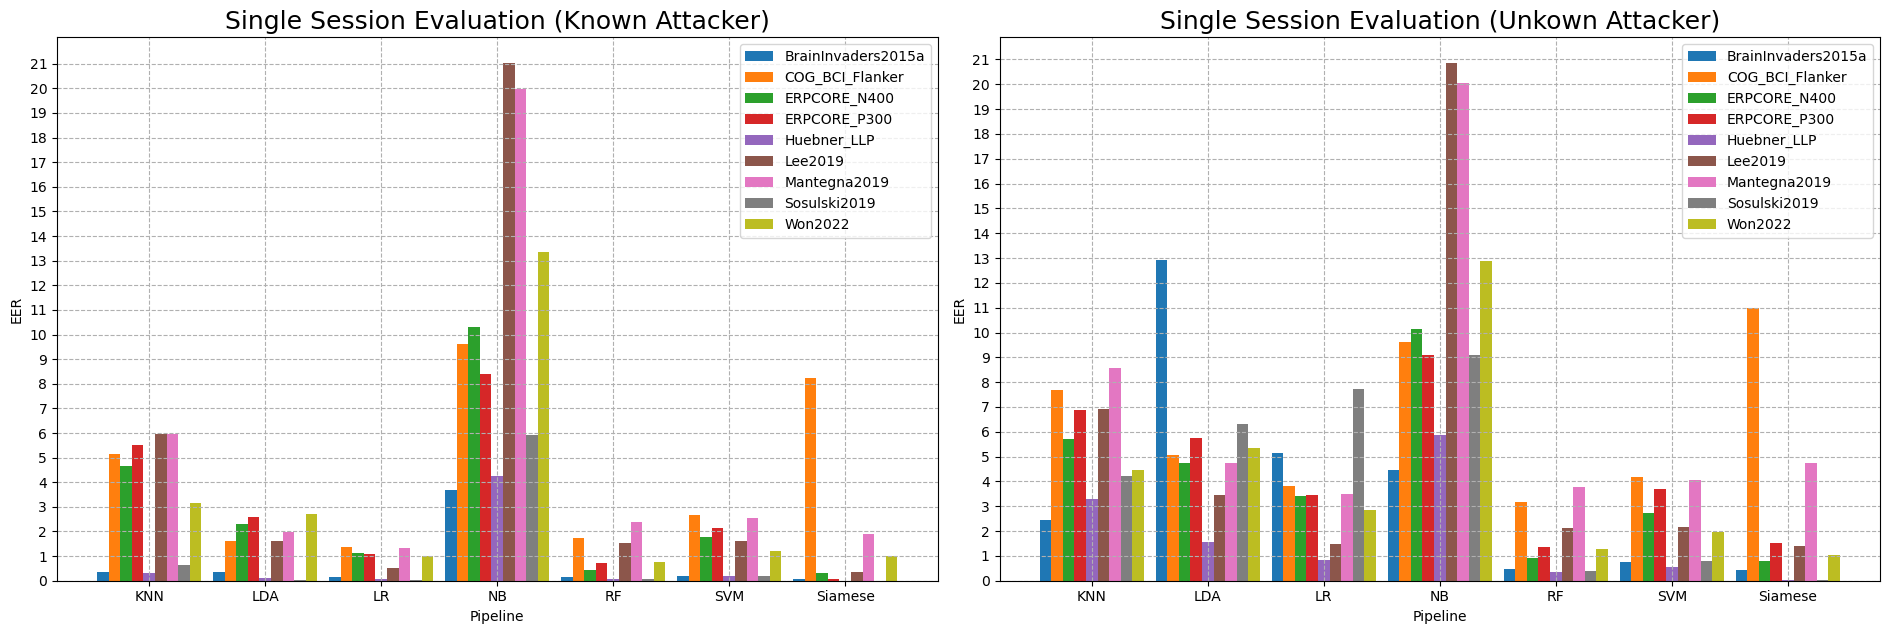

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrames
df_close = table_df_close[table_df_close['eval Type']=='Close Set']
df_open = table_df_close[table_df_close['eval Type']=='Open Set']

#print(df_open['pipeline'].unique())

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 7))
#fig.suptitle('Single-Session Evaluation')

# Plotting for Close Set
axs[0].set_title('Single Session Evaluation (Known Attacker)', fontsize=18)
df_close['eer'] = df_close['eer'].astype(float)
pipelines_close = df_close['pipeline'].unique()
datasets_close = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]
bar_width_close = 0.1
index_close = pd.Series(range(len(pipelines_close)))

for i, dataset in enumerate(datasets_close):
    dataset_df = df_close[df_close['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[0].bar(index_close + (bar_width_close * i), eer_values, bar_width_close, label=dataset)

axs[0].set_xlabel('Pipeline')
axs[0].set_ylabel('EER')
axs[0].set_xticks(index_close + bar_width_close * (len(datasets_close) - 1) / 2)
axs[0].set_xticklabels(pipelines_close)
axs[0].grid(True, ls="--", lw=0.8)
axs[0].legend()

# Plotting for Open Set
axs[1].set_title('Single Session Evaluation (Unkown Attacker)', fontsize=18)
df_open['eer'] = df_open['eer'].astype(float)
pipelines_open = df_open['pipeline'].unique()
datasets_open = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]
bar_width_open = 0.1
index_open = pd.Series(range(len(pipelines_open)))

for i, dataset in enumerate(datasets_open):
    #print("dataset", dataset)
    dataset_df = df_open[df_open['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[1].bar(index_open + (bar_width_open * i), eer_values, bar_width_open, label=dataset)

axs[1].set_xlabel('Pipeline')
axs[1].set_ylabel('EER')
axs[1].set_xticks(index_open + bar_width_open * (len(datasets_open) - 1) / 2)
axs[1].set_xticklabels(pipelines_open)
axs[1].grid(True, ls="--", lw=0.8)
axs[1].legend()

# Setting y-axis limits for both subplots
max_eer = max(df_close['eer'].max(), df_open['eer'].max())
for ax in axs:
    ax.set_yticks(range(0, int(max_eer) + 1, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlapping titles
plt.savefig('Single_Session_Evaluation.pdf', bbox_inches="tight")
plt.show()
